### Ridge Regression implementation for 2D data

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

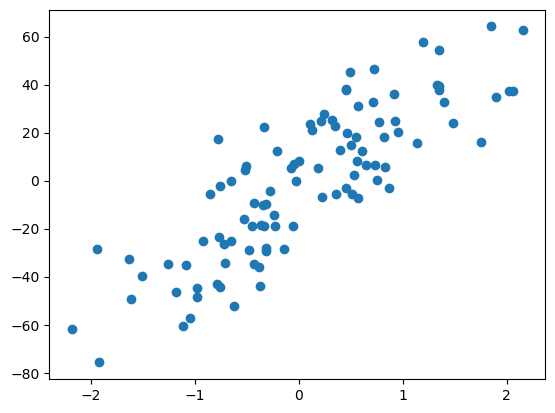

In [3]:
plt.scatter(X,y)

In [4]:
class RidgeRegression:
    def __init__(self, alpha=0.1):
        """
        Ridge Regression with L2 regularization.
        alpha: Regularization strength.
        """
        self.alpha = alpha
        self.m = None
        self.b = None

    def fit(self, X, y):
        """ Fit the model to the data.
        X : array-like, shape (n_samples, n_features)
            Training data.
        y : array-like, shape (n_samples,)
            Target values.
        """
        numerator = 0
        denominator = 0

        for i in range(len(X)):
            numerator += (X[i] - X.mean()) * (y[i] - y.mean())
            denominator += (X[i] - X.mean()) ** 2

        self.m = numerator / (denominator + self.alpha)
        self.b = y.mean() - self.m * X.mean()

    def predict(self, X):
        """ Predict using the fitted model.
        X : array-like, shape (n_samples, n_features)
            Samples to predict.
        Returns
        -------
        array-like, shape (n_samples,)
            Predicted values.
        """
        return self.m * X + self.b

In [5]:
ridge = RidgeRegression(alpha=0.1)
ridge.fit(X, y)

In [10]:
print("Ridge Coefficients:", ridge.m)
print("Ridge Intercept:", ridge.b)

Ridge Coefficients: [27.79608452]
Ridge Intercept: [-2.29287514]


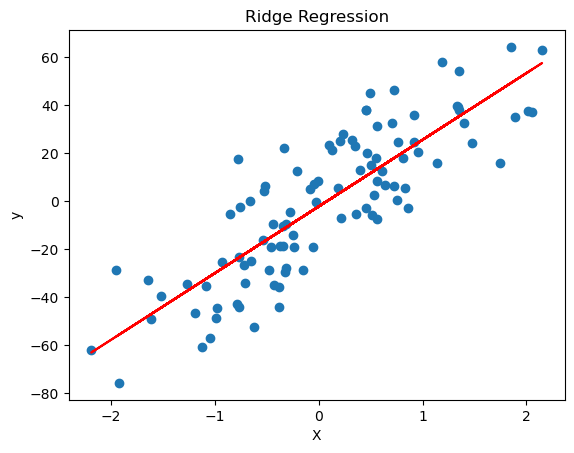

In [12]:
plt.scatter(X, y, label='Data')
plt.plot(X, ridge.predict(X), color='red', label='Ridge Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge Regression')
plt.show()


### Compare with inbuilt sklearn Ridge 

In [9]:
from sklearn.linear_model import Ridge
ridge_sklearn = Ridge(alpha=0.1)
ridge_sklearn.fit(X, y)
print("Ridge Coefficients:", ridge_sklearn.coef_)
print("Ridge Intercept:", ridge_sklearn.intercept_)

Ridge Coefficients: [27.79608452]
Ridge Intercept: -2.292875141775645


### Ridge Implementation for nD data